# 박조은 강사님 inflearn강의  
단 두장의 문서로 데이터 분석과 시각화 뽀개기 
출처: https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-pandas/lecture/20846?tab=note

## Combine Data Sets

### merge로 데이터프레임 합치기 left,right,inner, outer옵션 사용하기
컬럼의 축 합치기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
adf = pd.DataFrame({"x1":["A","B","C"],"x2":[1,2,3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [3]:
bdf = pd.DataFrame({"x1":["A","B","D"],"x3":["T","F","T"]})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [4]:
pd.merge(adf,bdf,how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [5]:
pd.merge(adf,bdf,how='right',on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [6]:
pd.merge(adf,bdf,how='inner',on ='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [7]:
pd.merge(adf,bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


#### Filtering Joins

In [8]:
adf.x1.isin(bdf.x1)

0     True
1     True
2    False
Name: x1, dtype: bool

In [9]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [10]:
# ~ 는 제외하고 가져오기
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


#### Set-like Operations

In [11]:
ydf = pd.DataFrame({"x1":["A","B","C"],"x2":[1,2,3]})
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [12]:
zdf = pd.DataFrame({"x1":["B","C","D"],"x2":[2,3,4]})
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [13]:
pd.merge(ydf,zdf)  #기본값이 inner join이라서 교차 값만 추출

,x1,x2
0,B,2
1,C,3


In [14]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [15]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


In [16]:
# pd.merge(ydf, zdf, how='outer', 
# indicator=True)   : 어떻게 merge를 했는지 알려줌
# .query('_merge == "left_only"') ; left_only 값만 가져와라
# .drop(columns=['_merge']) : '_merge'컬럼을 제외하고  추출


In [17]:
pd.merge?
# concat 위아래로 함칠때
# merge 옆으로 합칠때 

## Group Data

### groupby 활용하여 다양한 데이터 집계를 활용하기

In [18]:
df = sns.load_dataset("mpg")
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [19]:
#df.groupby(by="origin").size()   
# df.groupby(by="origin")뒤에 aggrigation func쳐야함
#df.groupby(by="origin").min()   
#df.groupby(by="origin").max()
df.groupby(by="origin")['cylinders'].size()   #특정 열만 볼수 있음

origin
europe     70
japan      79
usa       249
Name: cylinders, dtype: int64

In [20]:
# 동일한 결과를 나타내는 다른 방법
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [21]:
pd.DataFrame(df.groupby(['model_year','origin'])['cylinders'].mean())

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000
           usa      6.200000
72         europe   4.000000
           japan    3.800000
           usa      6.888889
73         europe   4.000000
           japan    4.250000
           usa      7.241379
74         europe   4.000000
           japan    4.000000
           usa      6.266667
75         europe   4.000000
           japan    4.000000
           usa      6.400000
76         europe   4.250000
           japan    4.500000
           usa      6.363636
77         europe   4.000000
           japan    4.166667
           usa      6.222222
78         europe   4.833333
           japan    4.000000
           usa      6.000000
79         europe   4.250000
           japan    4.000000
           usa      6.260870
80         europe   4.111111
           japan    4.076923
           usa      4.285714
81         europe   4.500000
           japan    4.333333
           usa      4.923077
82         europe   4.000000
           japan    4.000000
           usa      4.300000

In [22]:
df2 = pd.DataFrame(
[[4, 7, 10],
[5, 11, 8],
[6, 9, 12]], 
index=[1, 2, 3], 
columns=['a', 'b', 'c'])

In [23]:
df2

,a,b,c
1,4,7,10
2,5,11,8
3,6,9,12


In [24]:
#df2.shift(1) # row가 하나씩 아래로 이동  -1의 경우 위로 이동 
#df2.shift(-1)
df2['b'].shift(2)  
#결측치 처리시 유용하게 사용. 
# 1개의 컬럼 빔. 새로운 컬럼만든 후 shift값을 넣어주고 shift값으로 채우기

1    NaN
2    NaN
3    7.0
Name: b, dtype: float64

In [25]:
#df["model_year"].rank(method='dense')  #밀집도로 순위를 보여줌
#df["model_year"].rank(method='min') #이 값이 최소값으로 몇번째 순위인가?를 보여줌
df["model_year"].rank(method='min').value_counts()

86.0     40
245.0    36
183.0    34
368.0    31
153.0    30
339.0    29
281.0    29
310.0    29
1.0      29
217.0    28
58.0     28
30.0     28
126.0    27
Name: model_year, dtype: int64

In [26]:
#pct :퍼센트 또는 비율 의미
df["model_year"].rank(pct=True).head()

0    0.037688
1    0.037688
2    0.037688
3    0.037688
4    0.037688
Name: model_year, dtype: float64

In [27]:
df["model_year"].rank(method='first').head()
# method='first'를 적용안하며 ㄴ같은 값은 같은 순위에 있게 되는데, 
# 적용하는 경우 첫번째 값이 몇위인지 보여줌

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: model_year, dtype: float64

In [28]:
df2

,a,b,c
1,4,7,10
2,5,11,8
3,6,9,12


In [29]:
# cunsum 누적값
df2.cumsum()

,a,b,c
1,4,7,10
2,9,18,18
3,15,27,30


In [30]:
df2.cummax() # 최대값

,a,b,c
1,4,7,10
2,5,11,10
3,6,11,12


In [31]:
df2.cummin() # 최소값

,a,b,c
1,4,7,10
2,4,7,8
3,4,7,8


In [32]:
df2.cumprod()  #값을 곱해줌

,a,b,c
1,4,7,10
2,20,77,80
3,120,693,960


## 시계열데이터 분석 Windows

### 시계열 데이터(TIme Series Data)분석을 위한 판다스 Expanding and Rolling 이해하기

- https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html
-  실습코드 : https://github.com/corazzon/cracking-the-pandas-cheat-sheet 

-  https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

#### Rolling

In [40]:
s=pd.Series(np.random.randn(1000),
           index=pd.date_range('1/1/2015', periods=1000))

<AxesSubplot:>

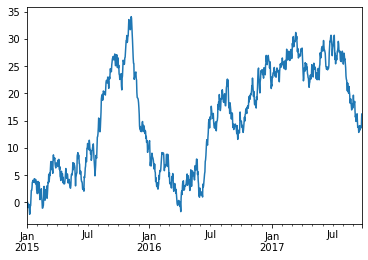

In [41]:
s=s.cumsum()
s.plot()

In [42]:
r = s.rolling(window=60)
r.mean()  # 앞부분은 window의 사이즈 만큼 이동시켜 준다. 값이 비어있음

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    19.952047
2017-09-23    19.750140
2017-09-24    19.521547
2017-09-25    19.326547
2017-09-26    19.152489
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

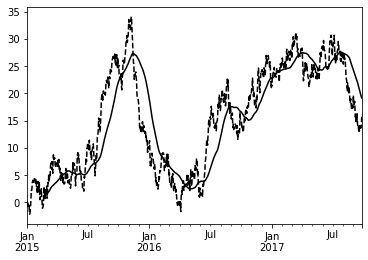

In [45]:
s.plot(style='k--')
r.mean().plot(style='k') # window를 잡은 만큼 추세선이  밀린다.
#rolling은 이동평균(Moving Average)을 구할 때 쓴다.

In [46]:
df = pd.DataFrame(np.random.randn(1000,4),
                 index=pd.date_range('1/1/2015', periods=1000),
                 columns=['A','B','C','D'])

In [47]:
df

,A,B,C,D
2015-01-01,0.261173,0.505570,-0.950105,-0.785970
2015-01-02,-1.285808,-0.843416,-0.227722,-1.379027
2015-01-03,0.951606,-0.636095,-0.840495,-0.299818
2015-01-04,0.932278,-1.274716,-2.836255,-0.169076
2015-01-05,-1.098332,1.436173,-0.718635,-1.183601
...,...,...,...,...
2017-09-22,1.514930,0.802420,1.456859,0.405322
2017-09-23,-0.283073,-0.828472,0.629669,1.478703
2017-09-24,2.248322,-0.472612,0.965489,-0.170673
2017-09-25,0.218553,0.471929,0.597423,0.156850


<AxesSubplot:>

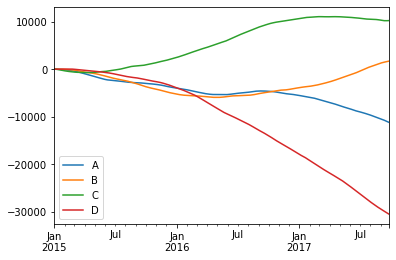

In [50]:
df = df.cumsum()
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

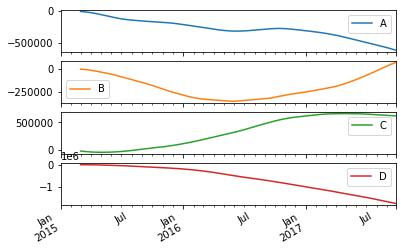

In [52]:
df.rolling(window=60).sum().plot(subplots=True)

#### Expanding Windows

- Rolling 경우, window사이즈를 정해주고 그 사이즈 만큼 값을 이동해서 평균을 구하거나 할때 사용

- Expanding 경우, 누적해서 값을 사용한다.

<AxesSubplot:>

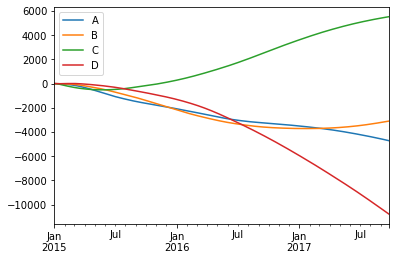

In [55]:
#df.rolling(window=len(df), min_periods=1).mean()[:5]
df.rolling(window=len(df), min_periods=1).mean().plot()

<AxesSubplot:>

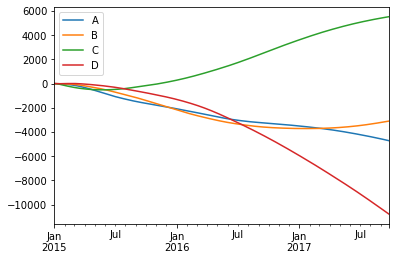

In [57]:
#df.expanding(min_periods=1).mean()
df.expanding(min_periods=1).mean().plot()

In [ ]:
df.expanding?

In [58]:
dfe = pd.DataFrame({"B": [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

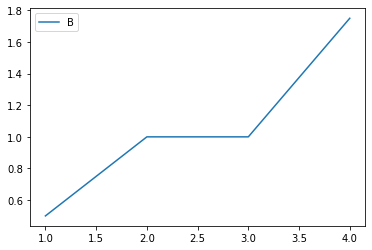

In [61]:
#결측치로 인한 끊긴 부분 잇기
#dfe.expanding(2).sum()
dfe.expanding(2).mean().plot()